### Notebook 2 - technology graph topology analysis (solution 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import os
import warnings
warnings.filterwarnings('ignore')
centr_folder = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/technology1/'
output_folder = 'centrality_ranking_visual/technology1/'

general graph topology analysis

In [2]:
graph_descr = pd.read_csv('/Users/koshelev/Documents/lmu/thesis/3-graph_description/graph_descriptions/technology1.csv', index_col=0)
graph_descr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1963 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodes         37 non-null     int64  
 1   edges         37 non-null     int64  
 2   degrees_w     37 non-null     float64
 3   degrees_nw    37 non-null     float64
 4   alcc_nw       37 non-null     float64
 5   spl_nw        34 non-null     float64
 6   algebrcon_nw  37 non-null     float64
 7   deg_centr     37 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 2.6 KB


In [3]:
graph_descr.describe()

nodes        edges     degrees_w  degrees_nw    alcc_nw  \
count   37.000000    37.000000     37.000000   37.000000  37.000000   
mean   105.351351   997.675676   6957.455092   18.732045   0.659407   
std     13.279508   211.276550   2774.947408    2.770211   0.057898   
min     42.000000   219.000000    278.476190   10.428571   0.513836   
25%    106.000000   910.000000   4981.853211   17.119266   0.631690   
50%    108.000000  1098.000000   7467.851240   19.807018   0.660611   
75%    111.000000  1129.000000   8731.247706   20.605505   0.700275   
max    121.000000  1193.000000  11688.385321   22.150943   0.747169   

          spl_nw  algebrcon_nw  deg_centr  
count  34.000000     37.000000  37.000000  
mean    1.157963      0.809812   0.181094  
std     0.101786      0.261254   0.024873  
min     1.001065      0.000000   0.134476  
25%     1.109534      0.881870   0.164618  
50%     1.138825      0.901836   0.189757  
75%     1.190536      0.915655   0.195447  
max     1.519744      0.937681   0.254355

In [4]:
graph_descr.head()

nodes  edges    degrees_w  degrees_nw   alcc_nw    spl_nw  algebrcon_nw  \
1963     99    655  2673.818182   13.232323  0.540952  1.108328      0.880071   
1964     97    646  2937.773196   13.319588  0.554266  1.031250      0.881870   
1965    108    777  3723.851852   14.388889  0.579510  1.026480      0.882500   
1966    106    795  4385.735849   15.000000  0.591940  1.130638      0.880569   
1967    106    853  4468.226415   16.094340  0.631690  1.192093      0.908201   

      deg_centr  
1963   0.135024  
1964   0.138746  
1965   0.134476  
1966   0.142857  
1967   0.153279

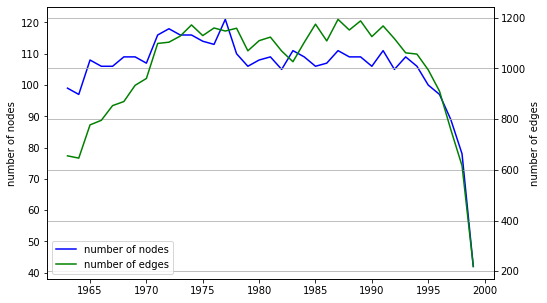

In [5]:
plt.figure(figsize=(8, 5))
ax1 = plt.subplot()
l1, = ax1.plot(graph_descr['nodes'], color='blue')
ax2 = ax1.twinx()
l2, = ax2.plot(graph_descr['edges'], color='green')
plt.legend([l1, l2], ['number of nodes', 'number of edges'])
ax1.set_ylabel('number of nodes')
ax2.set_ylabel('number of edges')
plt.grid()
plt.show()

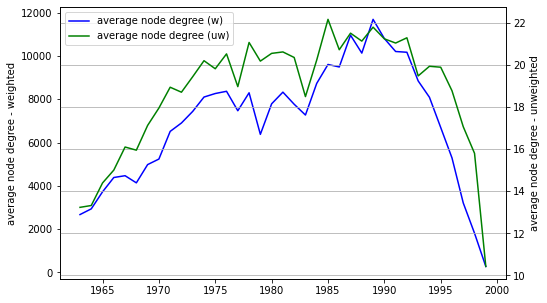

In [6]:
plt.figure(figsize=(8, 5))
ax1 = plt.subplot()
l1, = ax1.plot(graph_descr['degrees_w'], color='blue')
ax2 = ax1.twinx()
l2, = ax2.plot(graph_descr['degrees_nw'], color='green')
plt.legend([l1, l2], ['average node degree (w)', 'average node degree (uw)'])
ax1.set_ylabel('average node degree - weighted')
ax2.set_ylabel('average node degree - unweighted')
plt.grid()
plt.show()

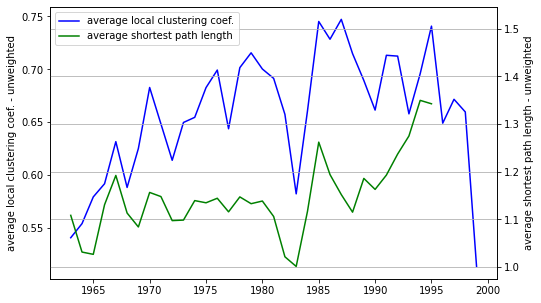

In [7]:
plt.figure(figsize=(8, 5))
ax1 = plt.subplot()
l1, = ax1.plot(graph_descr['alcc_nw'], color='blue')
ax2 = ax1.twinx()
l2, = ax2.plot(graph_descr['spl_nw'], color='green')
plt.legend([l1, l2], ['average local clustering coef.', 'average shortest path length'])
ax1.set_ylabel('average local clustering coef. - unweighted')
ax2.set_ylabel('average shortest path length - unweighted')
plt.grid()
plt.show()

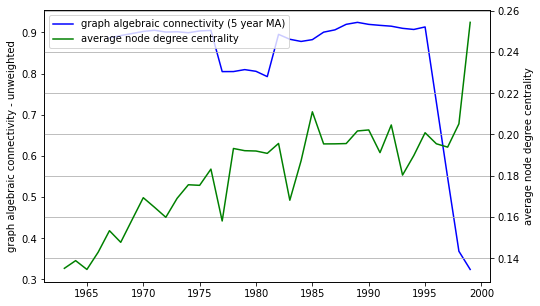

In [8]:
plt.figure(figsize=(8, 5))
ax1 = plt.subplot()
l1, = ax1.plot(graph_descr['algebrcon_nw'].rolling(5).mean(), color='blue')
ax2 = ax1.twinx()
l2, = ax2.plot(graph_descr['deg_centr'], color='green')
plt.legend([l1, l2], ['graph algebraic connectivity (5 year MA)', 'average node degree centrality'])
ax1.set_ylabel('graph algebraic connectivity - unweighted')
ax2.set_ylabel('average node degree centrality')
plt.grid()
plt.show()

node centrality analysis

In [10]:
centr_types = []
centr_dfs = []
centr_rank_dfs = []
for filename in os.listdir(centr_folder):
    centr_types.append(filename[:-4])
    print(filename[:-4])
    centr_dfs.append(pd.read_csv(centr_folder+filename, index_col=0).sort_values(by=1999, axis=1, ascending=False))
    centr_rank_dfs.append((centr_dfs[-1] * (-1)).rank(axis=1))

betweenness_centr_uw
pagerank_centr_uw
degree_centr
pagerank_centr
eigenv_centr
eigenv_centr_uw
closeness_centr
betweenness_centr


In [11]:
def plot_bumpchart(df, title, topN=20):
    df.fillna(method='ffill', inplace=True)
    plt.figure(figsize=(50, 22))
    ax = plt.subplot()
    colors = list(plt.cm.tab20_r(np.arange(20)))
    ax.set_prop_cycle('color', colors)
    plt.gca().invert_yaxis()
    plt.plot(df.iloc[5:, :topN], 'o-', linewidth=2)
    plt.legend(df.columns[:topN], loc="lower center", ncol=len(df.columns[:topN]), fontsize=20)
    plt.yticks(np.arange(1, 41, 1.0), fontsize=20)
    plt.ylim(43, 0)
    plt.xticks(fontsize=20)
    plt.xlim(df.index[5], df.index[-1])
    loc = plticker.MultipleLocator(base=1.0)
    ax.xaxis.set_major_locator(loc)
    plt.xlabel('Year', fontsize=40)
    plt.ylabel('Centrality Rank', fontsize=40)
    plt.grid(axis='x')
    plt.title(title, fontsize=40)
    plt.savefig(f'{output_folder}{title}_top{topN}.pdf')
    plt.show()

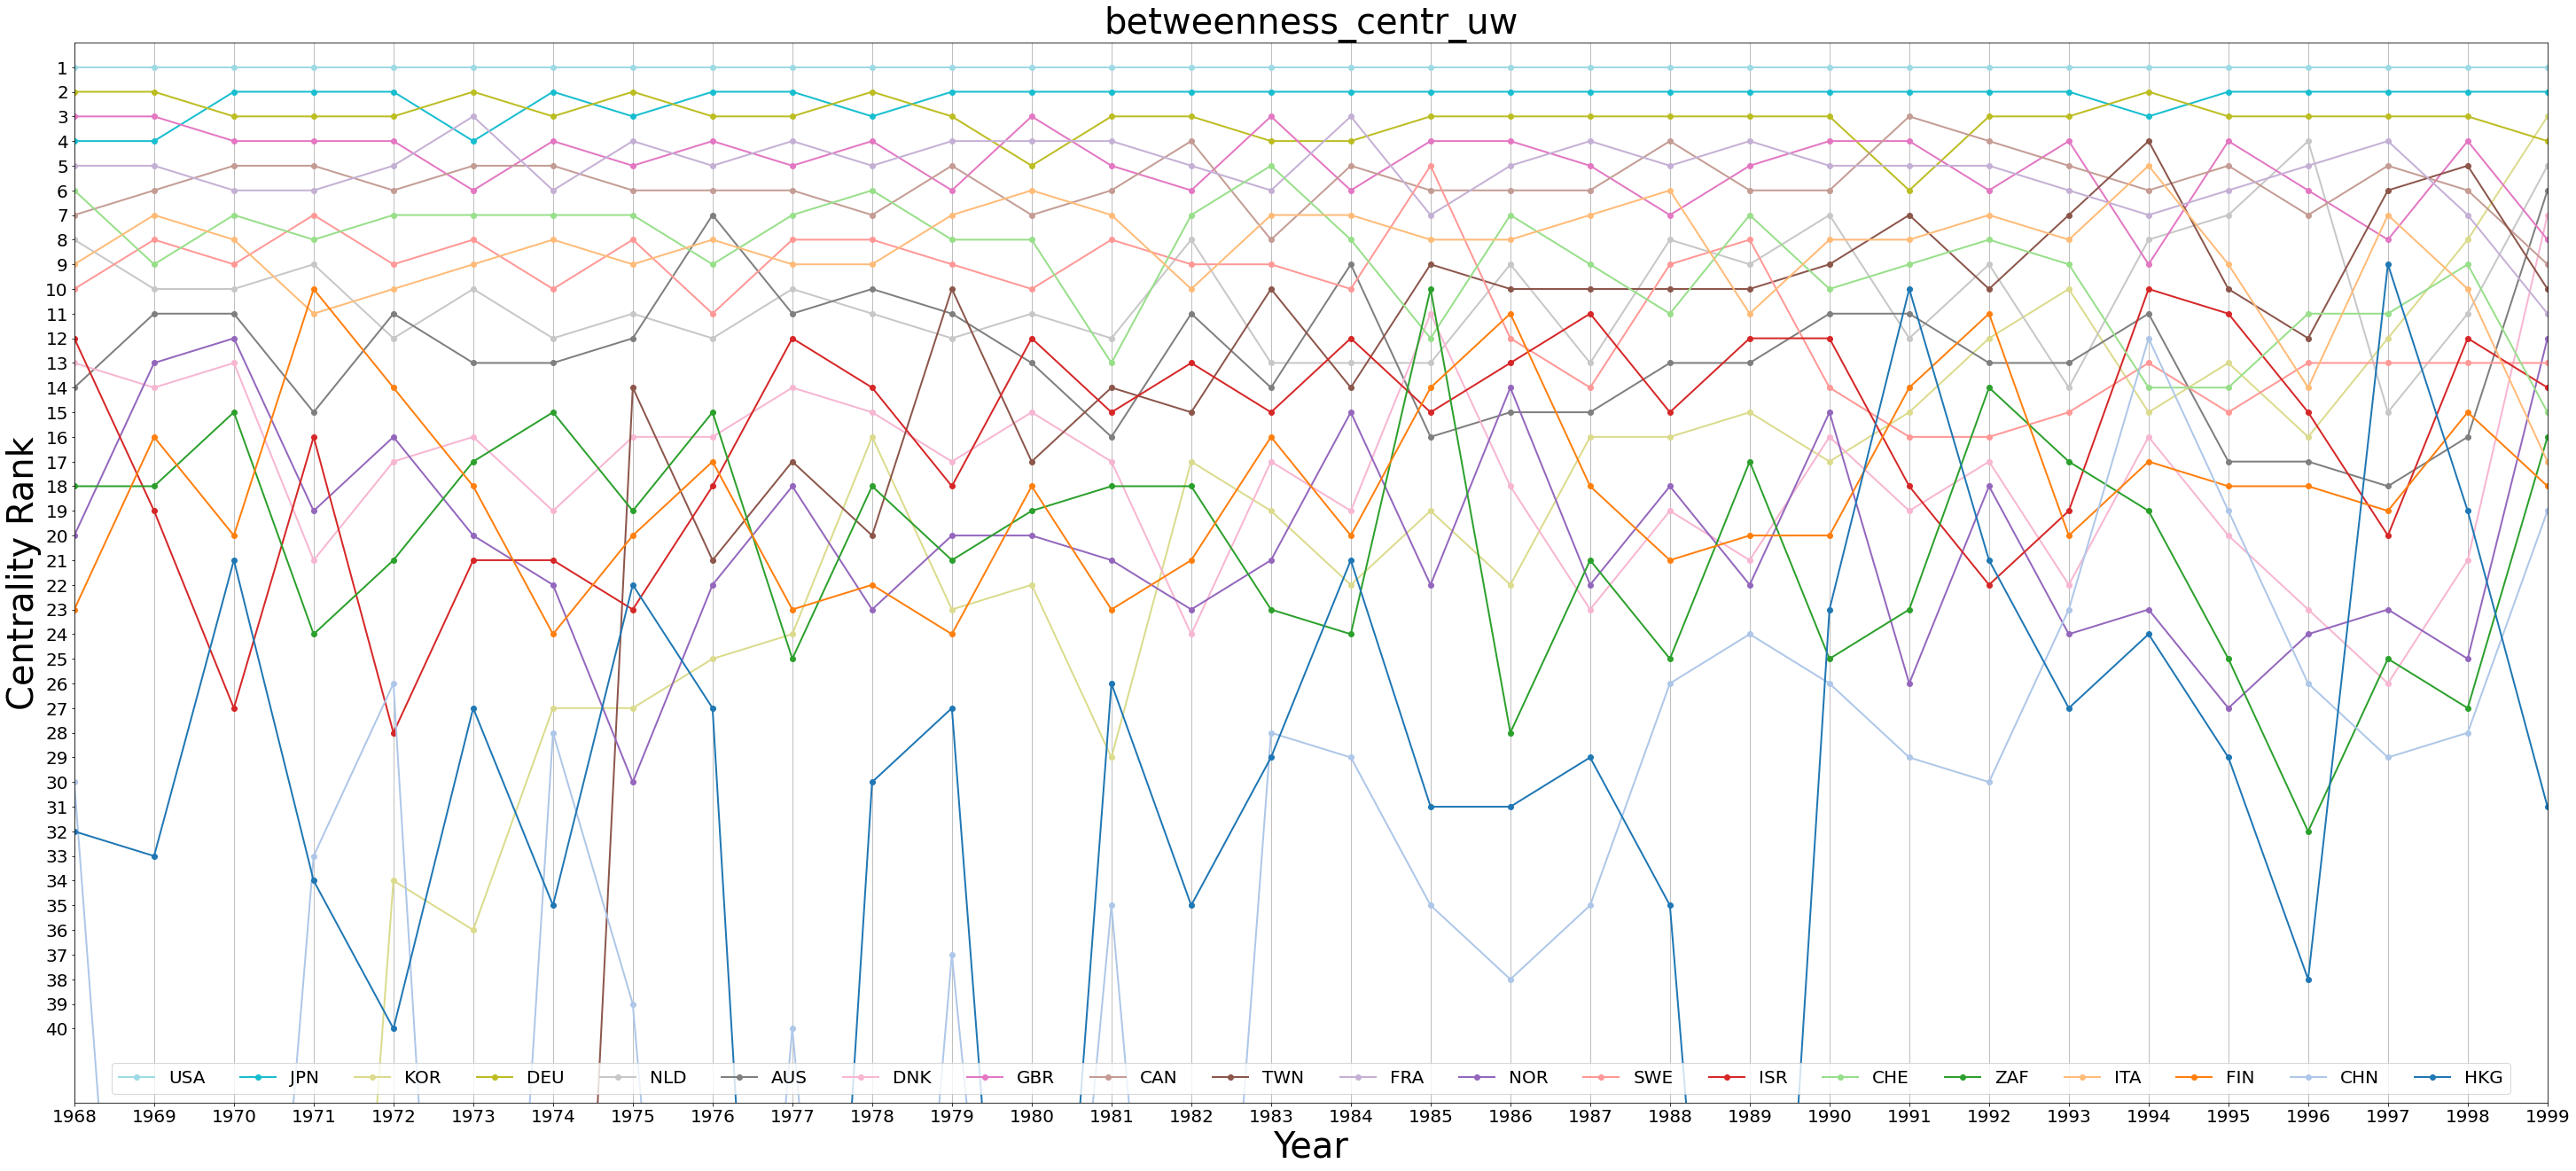

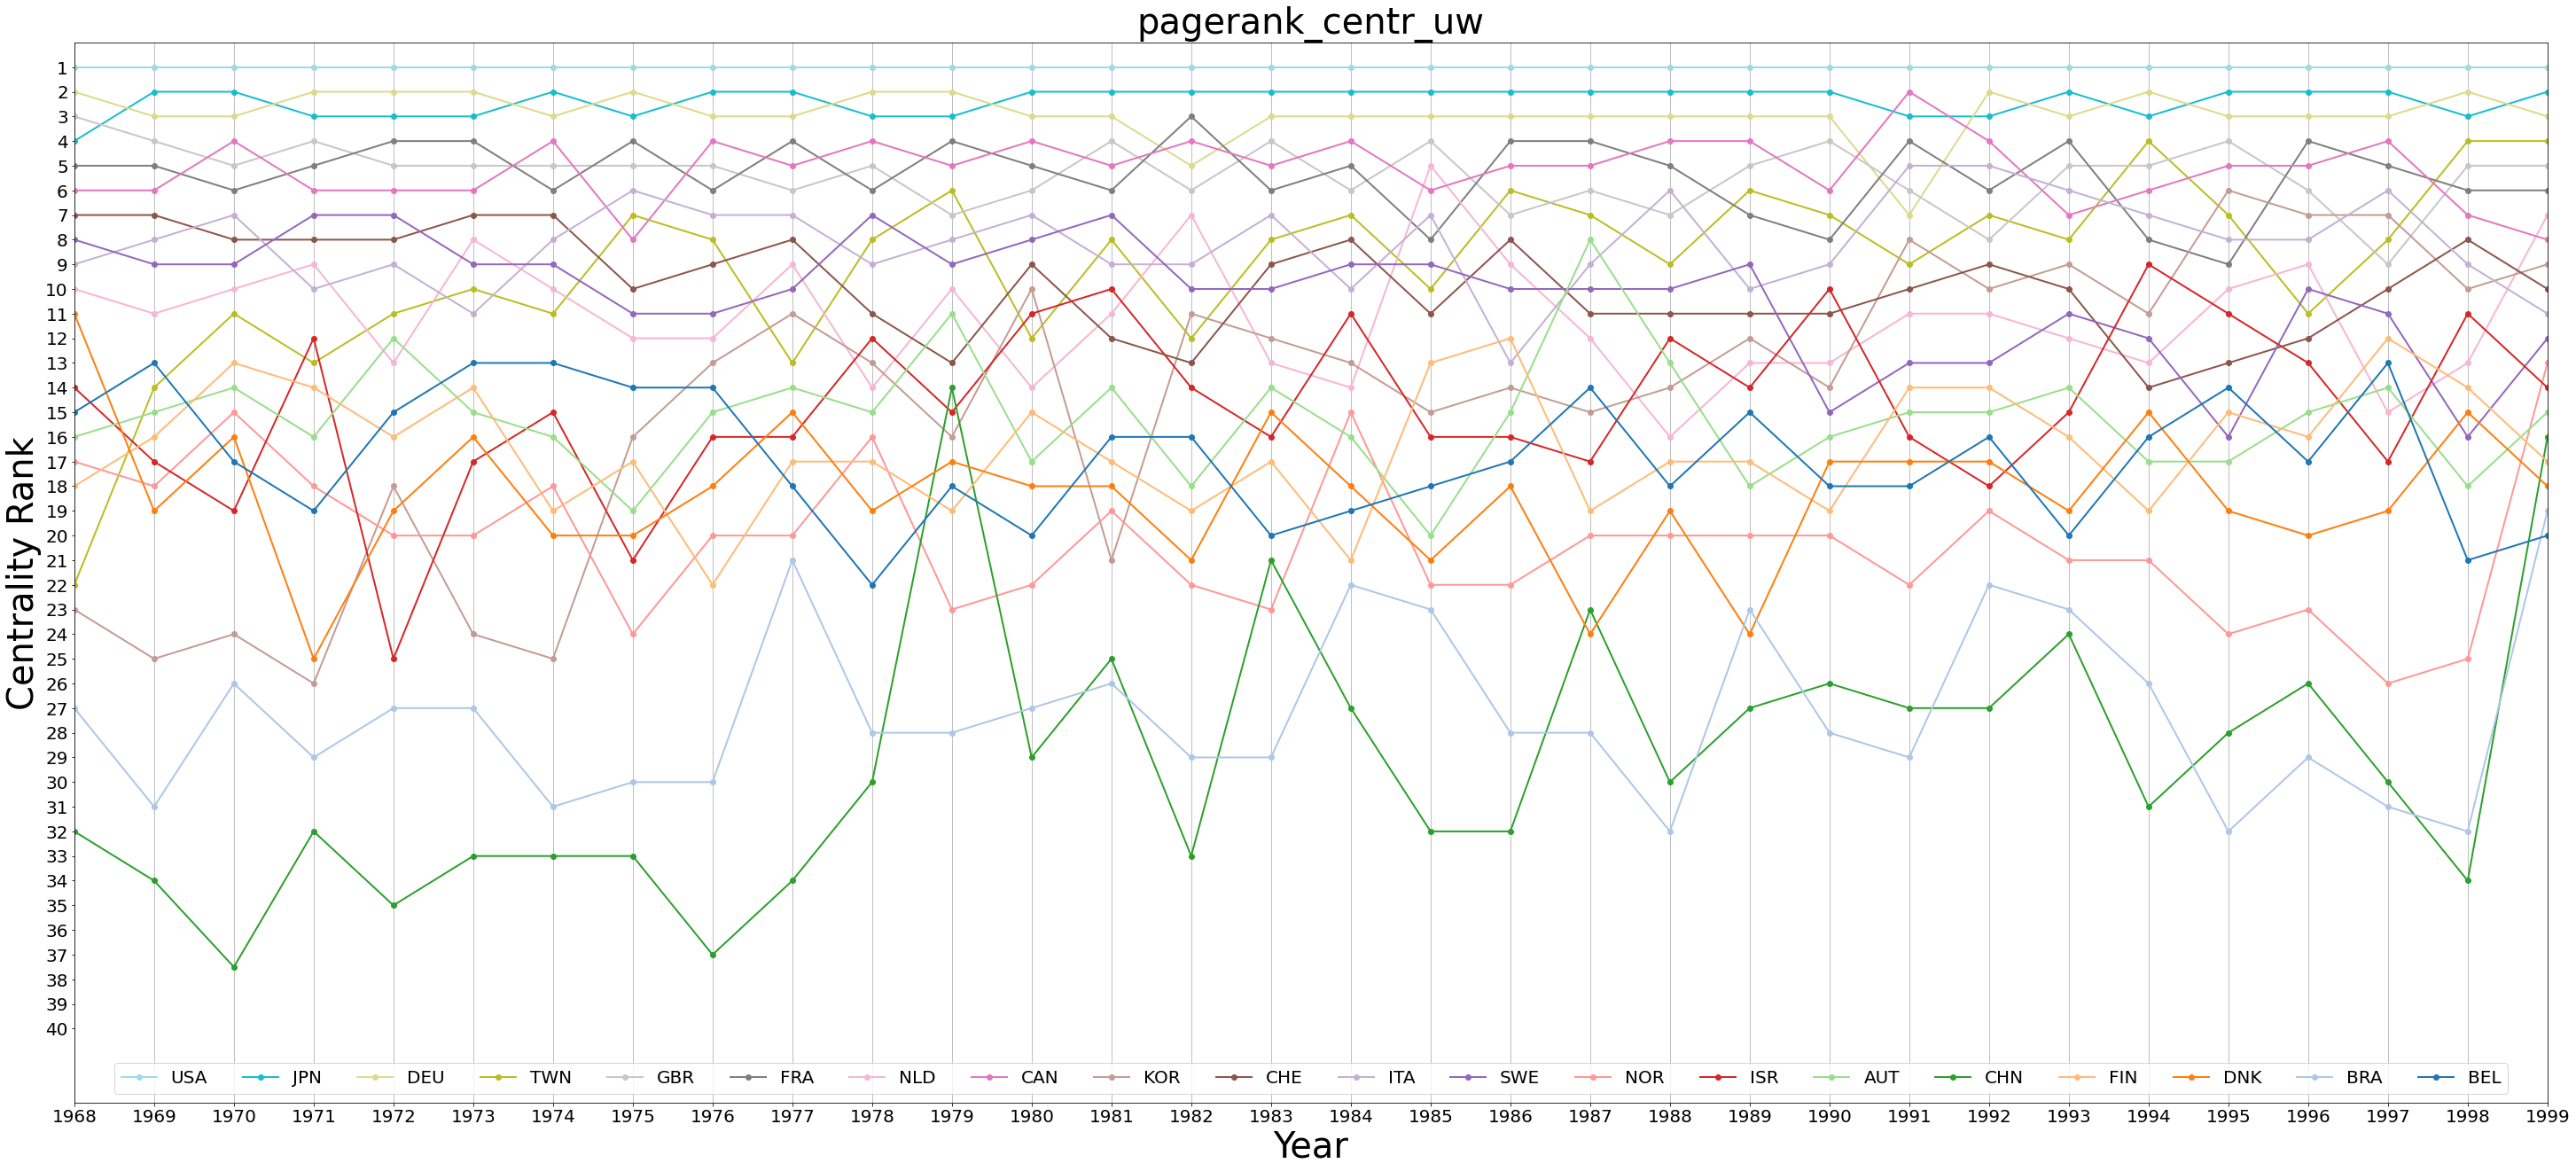

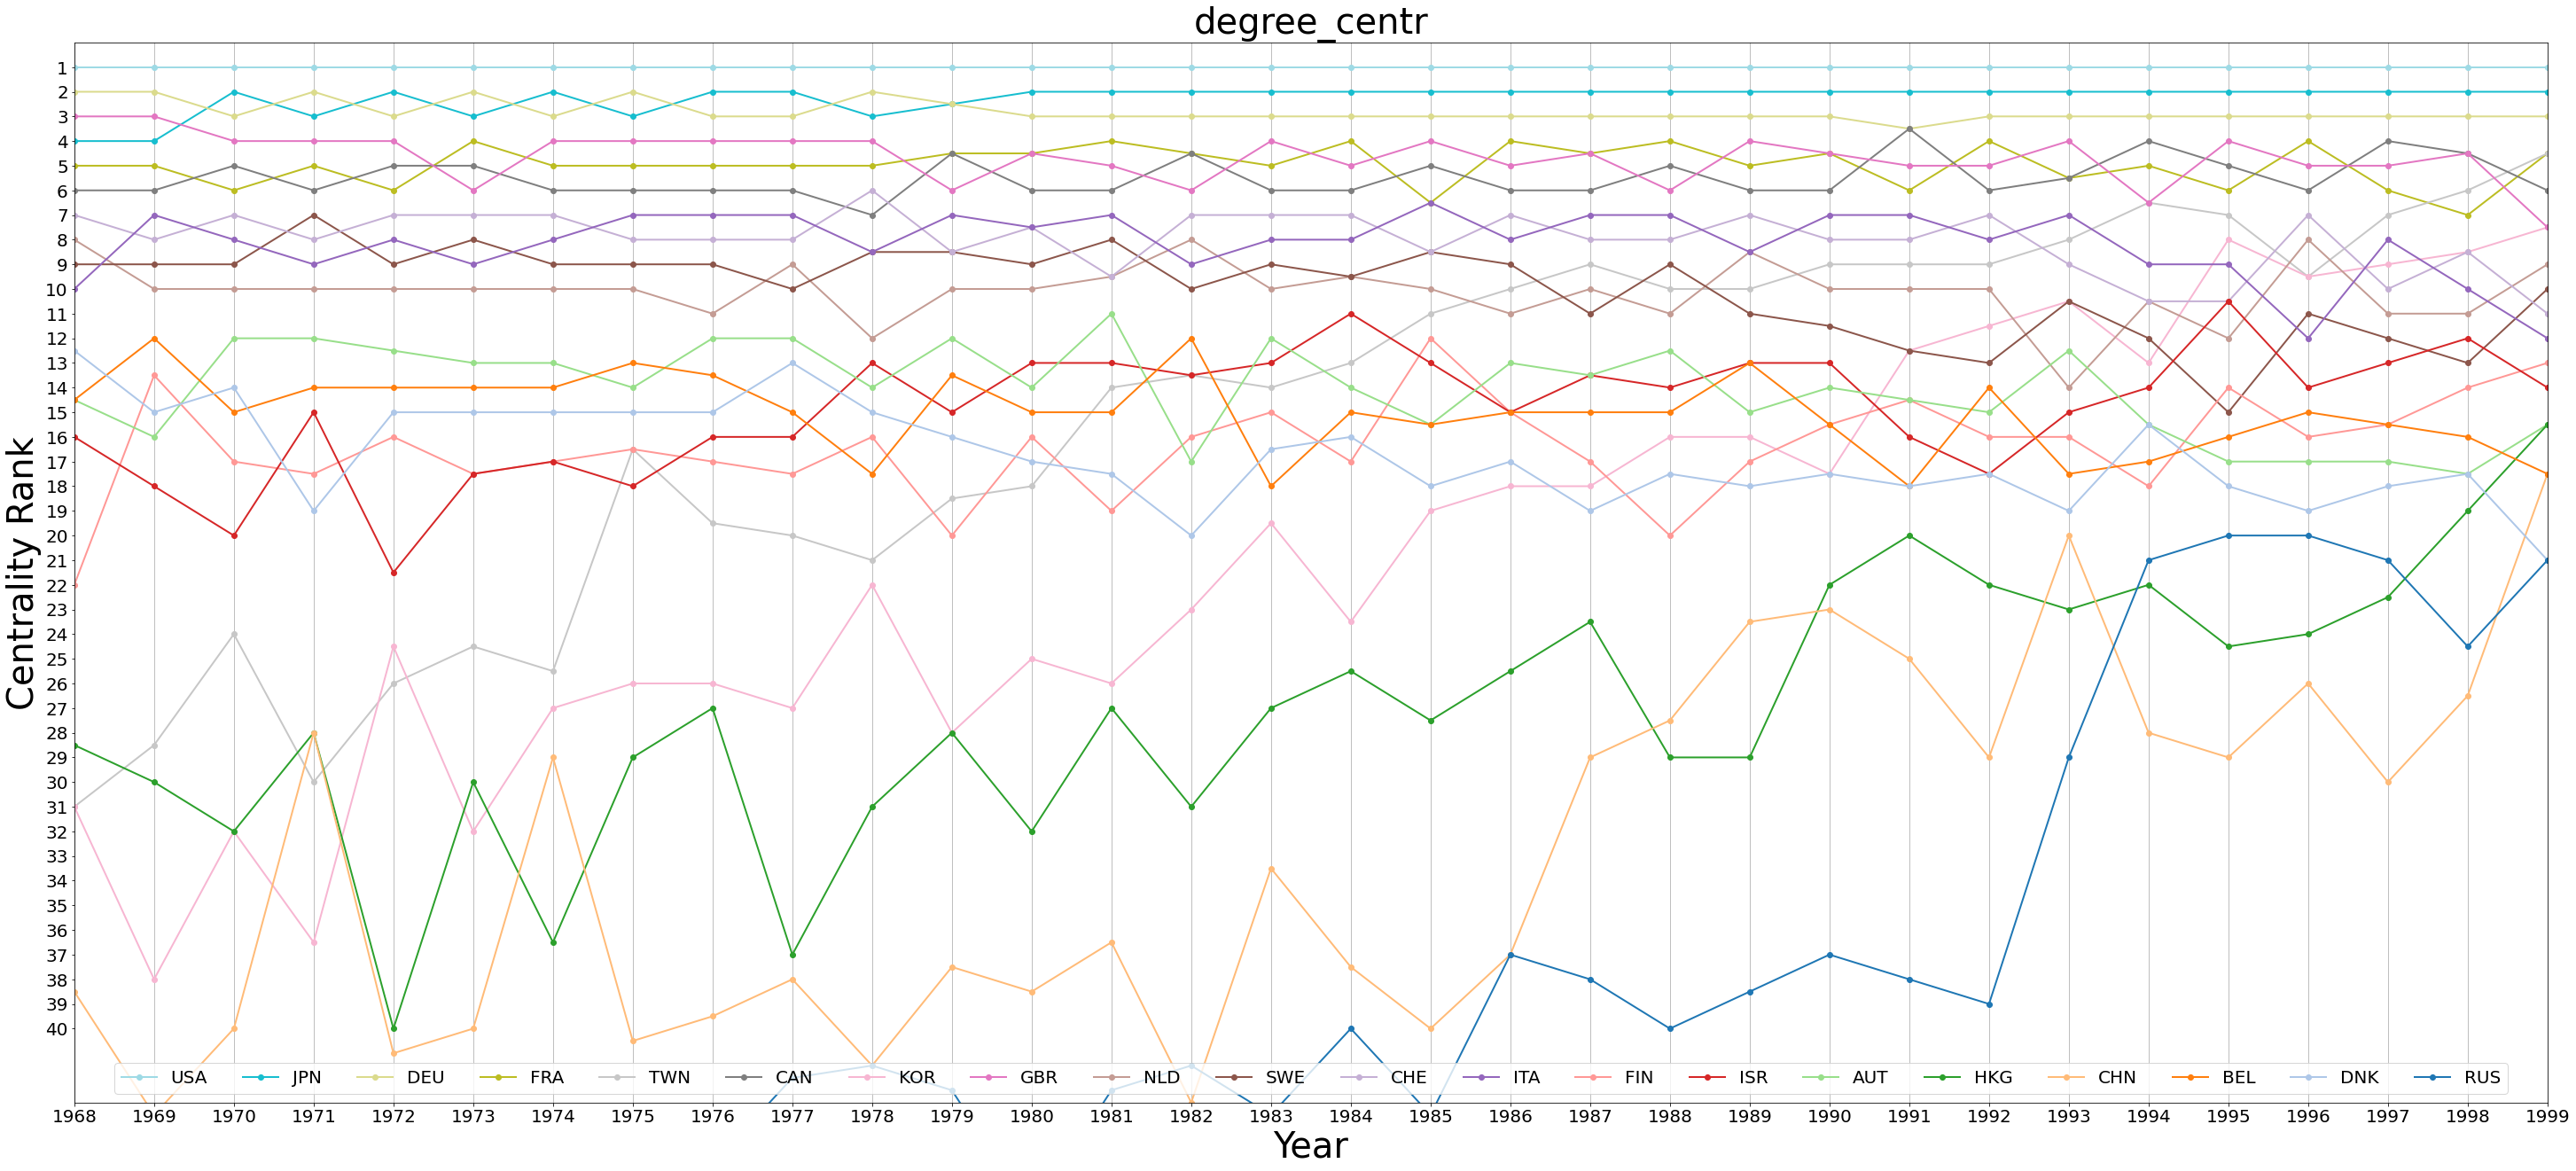

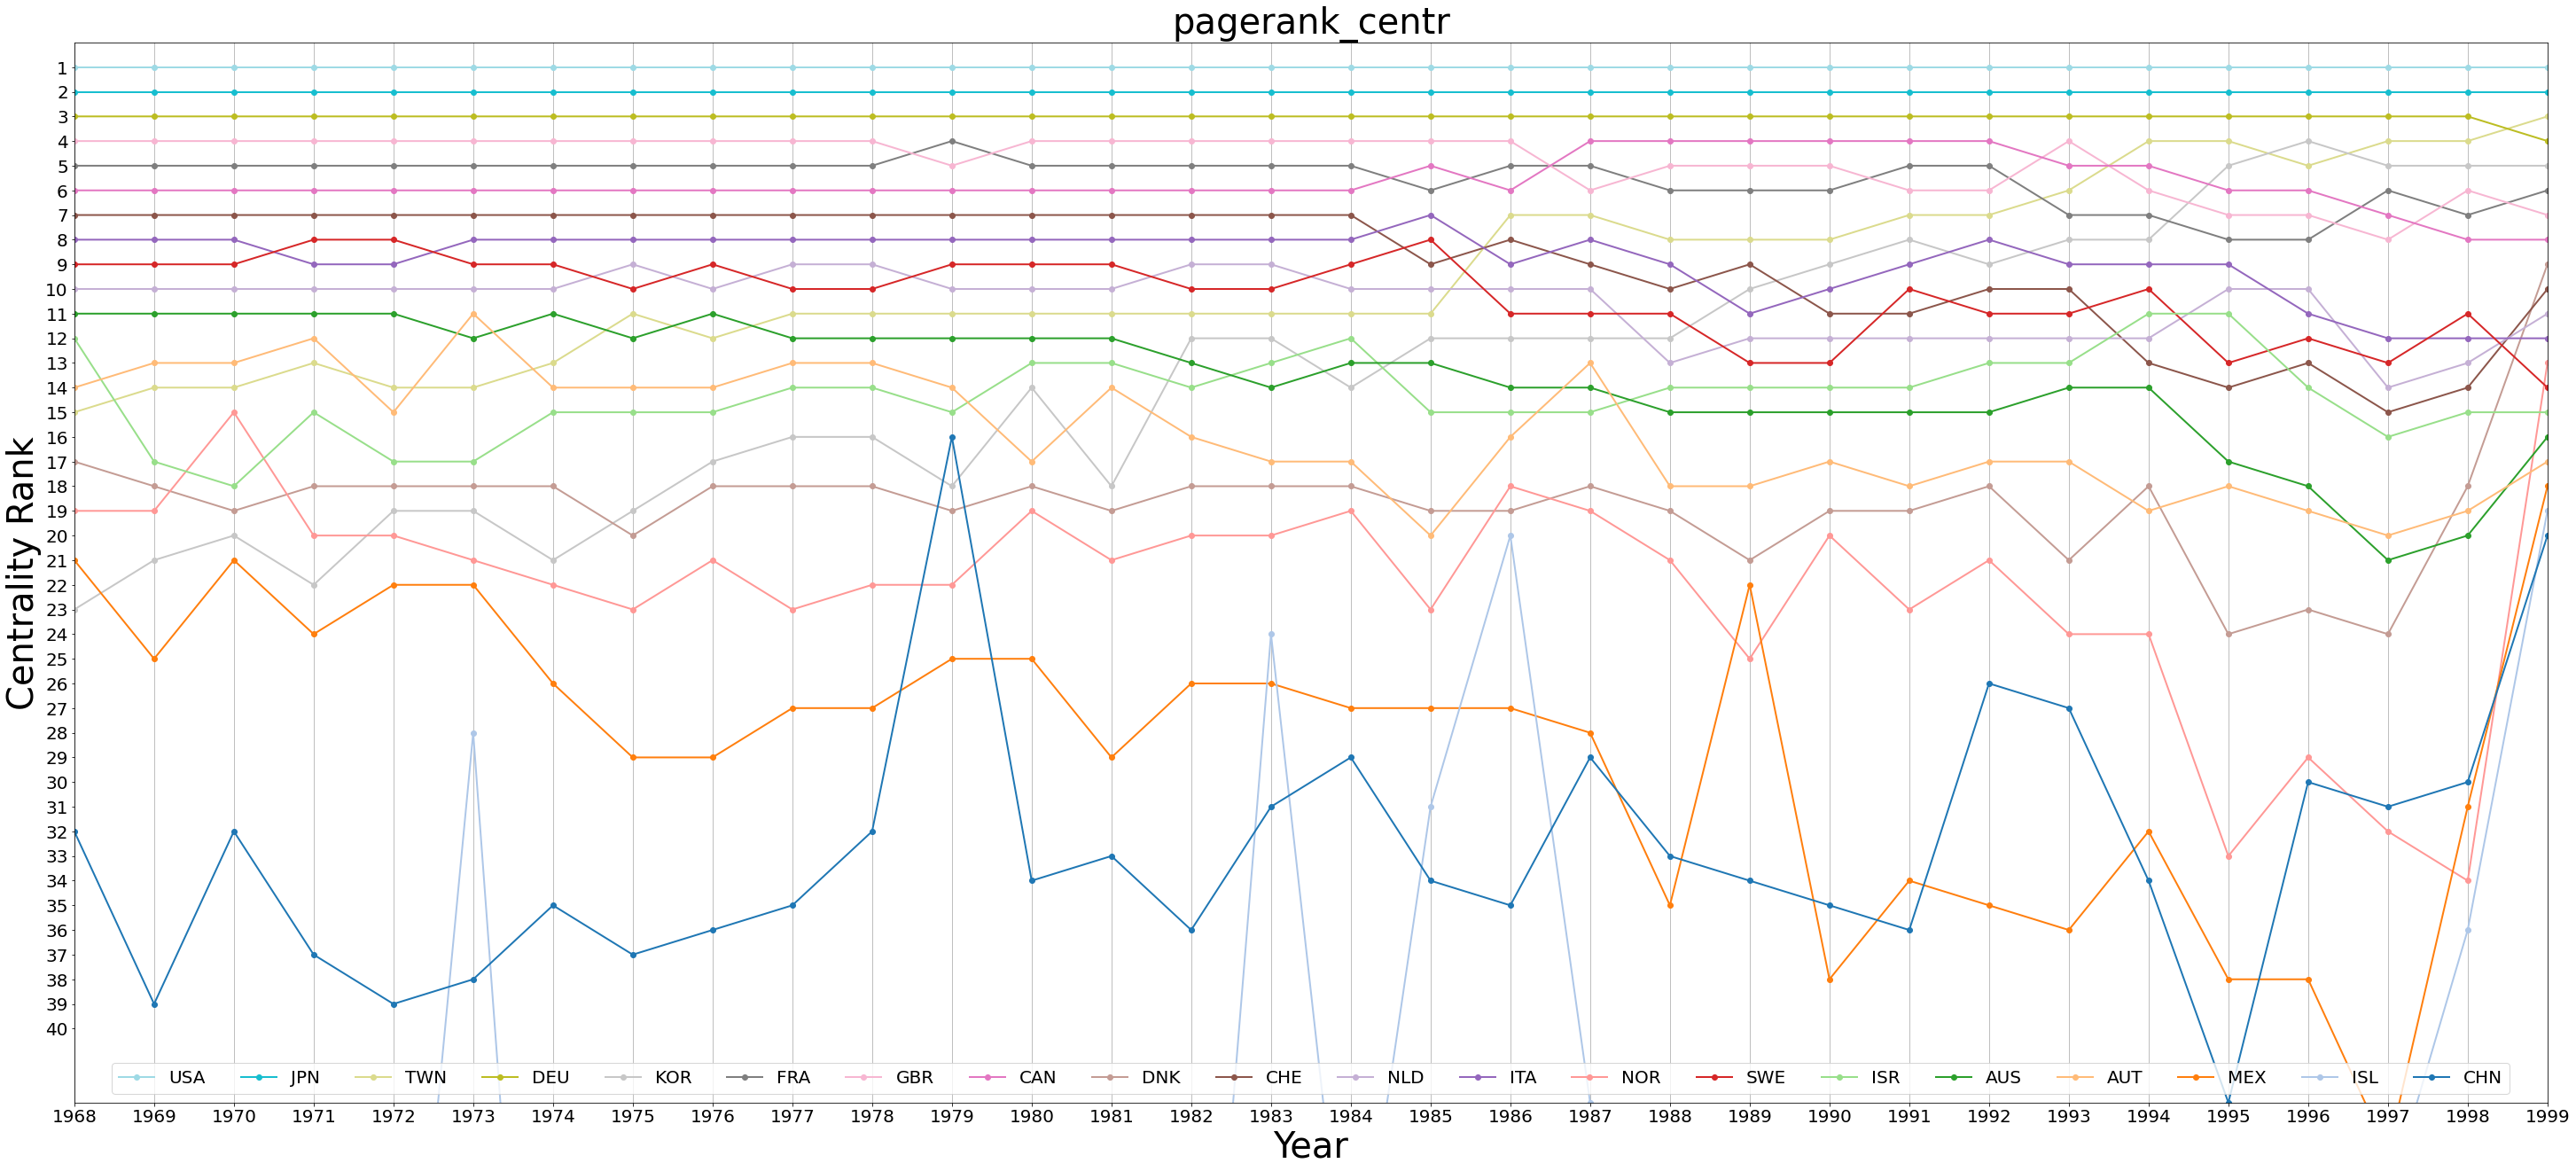

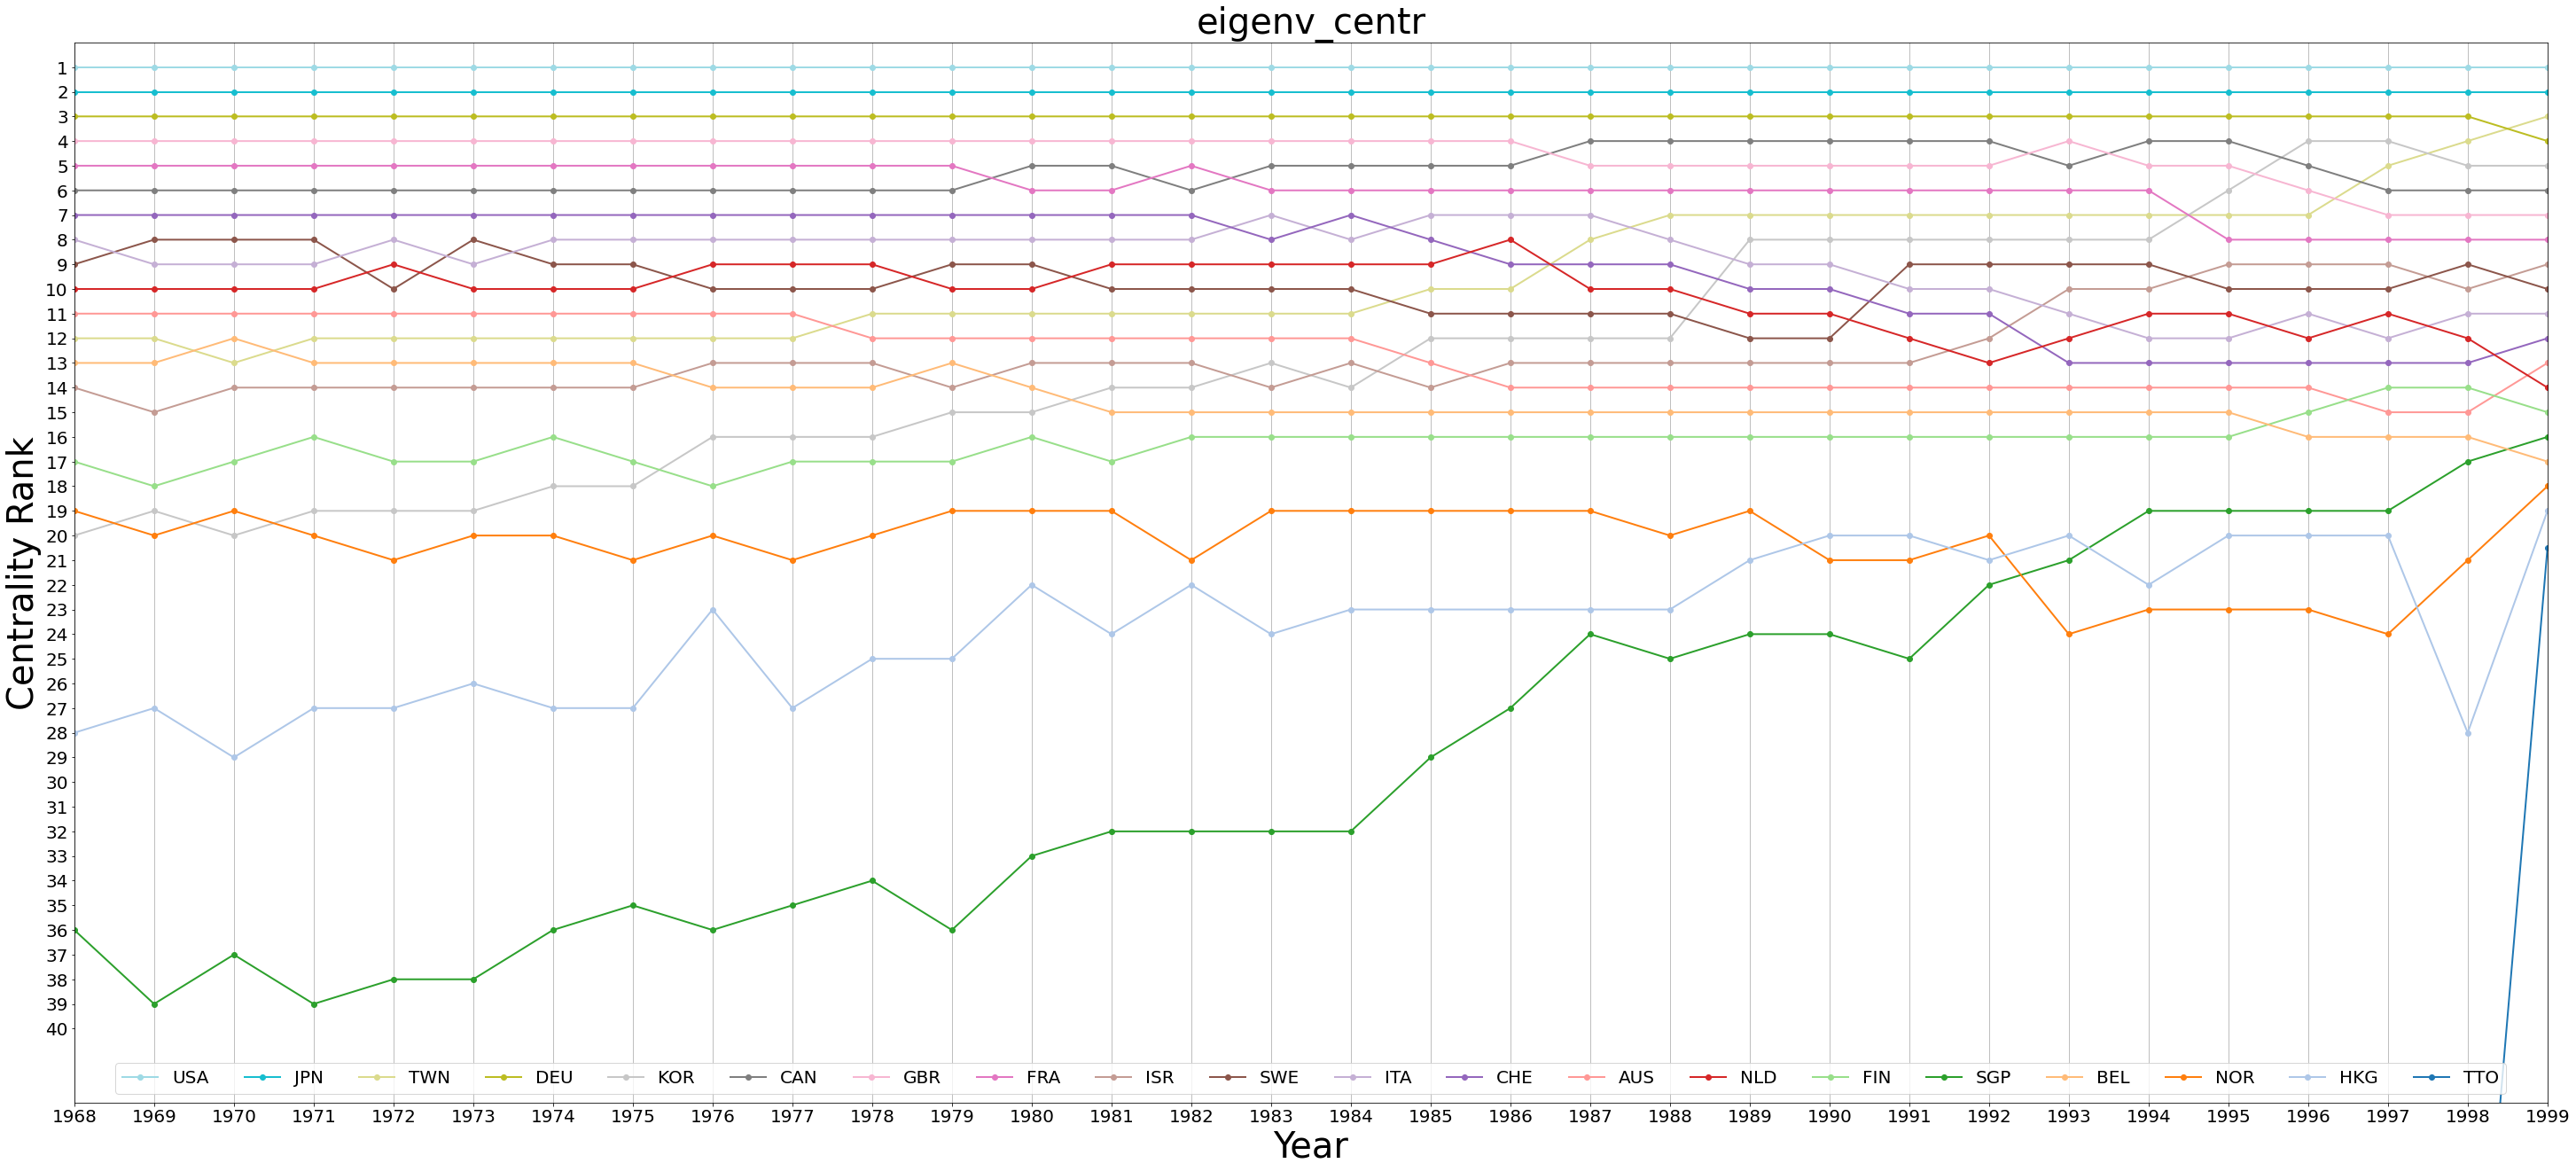

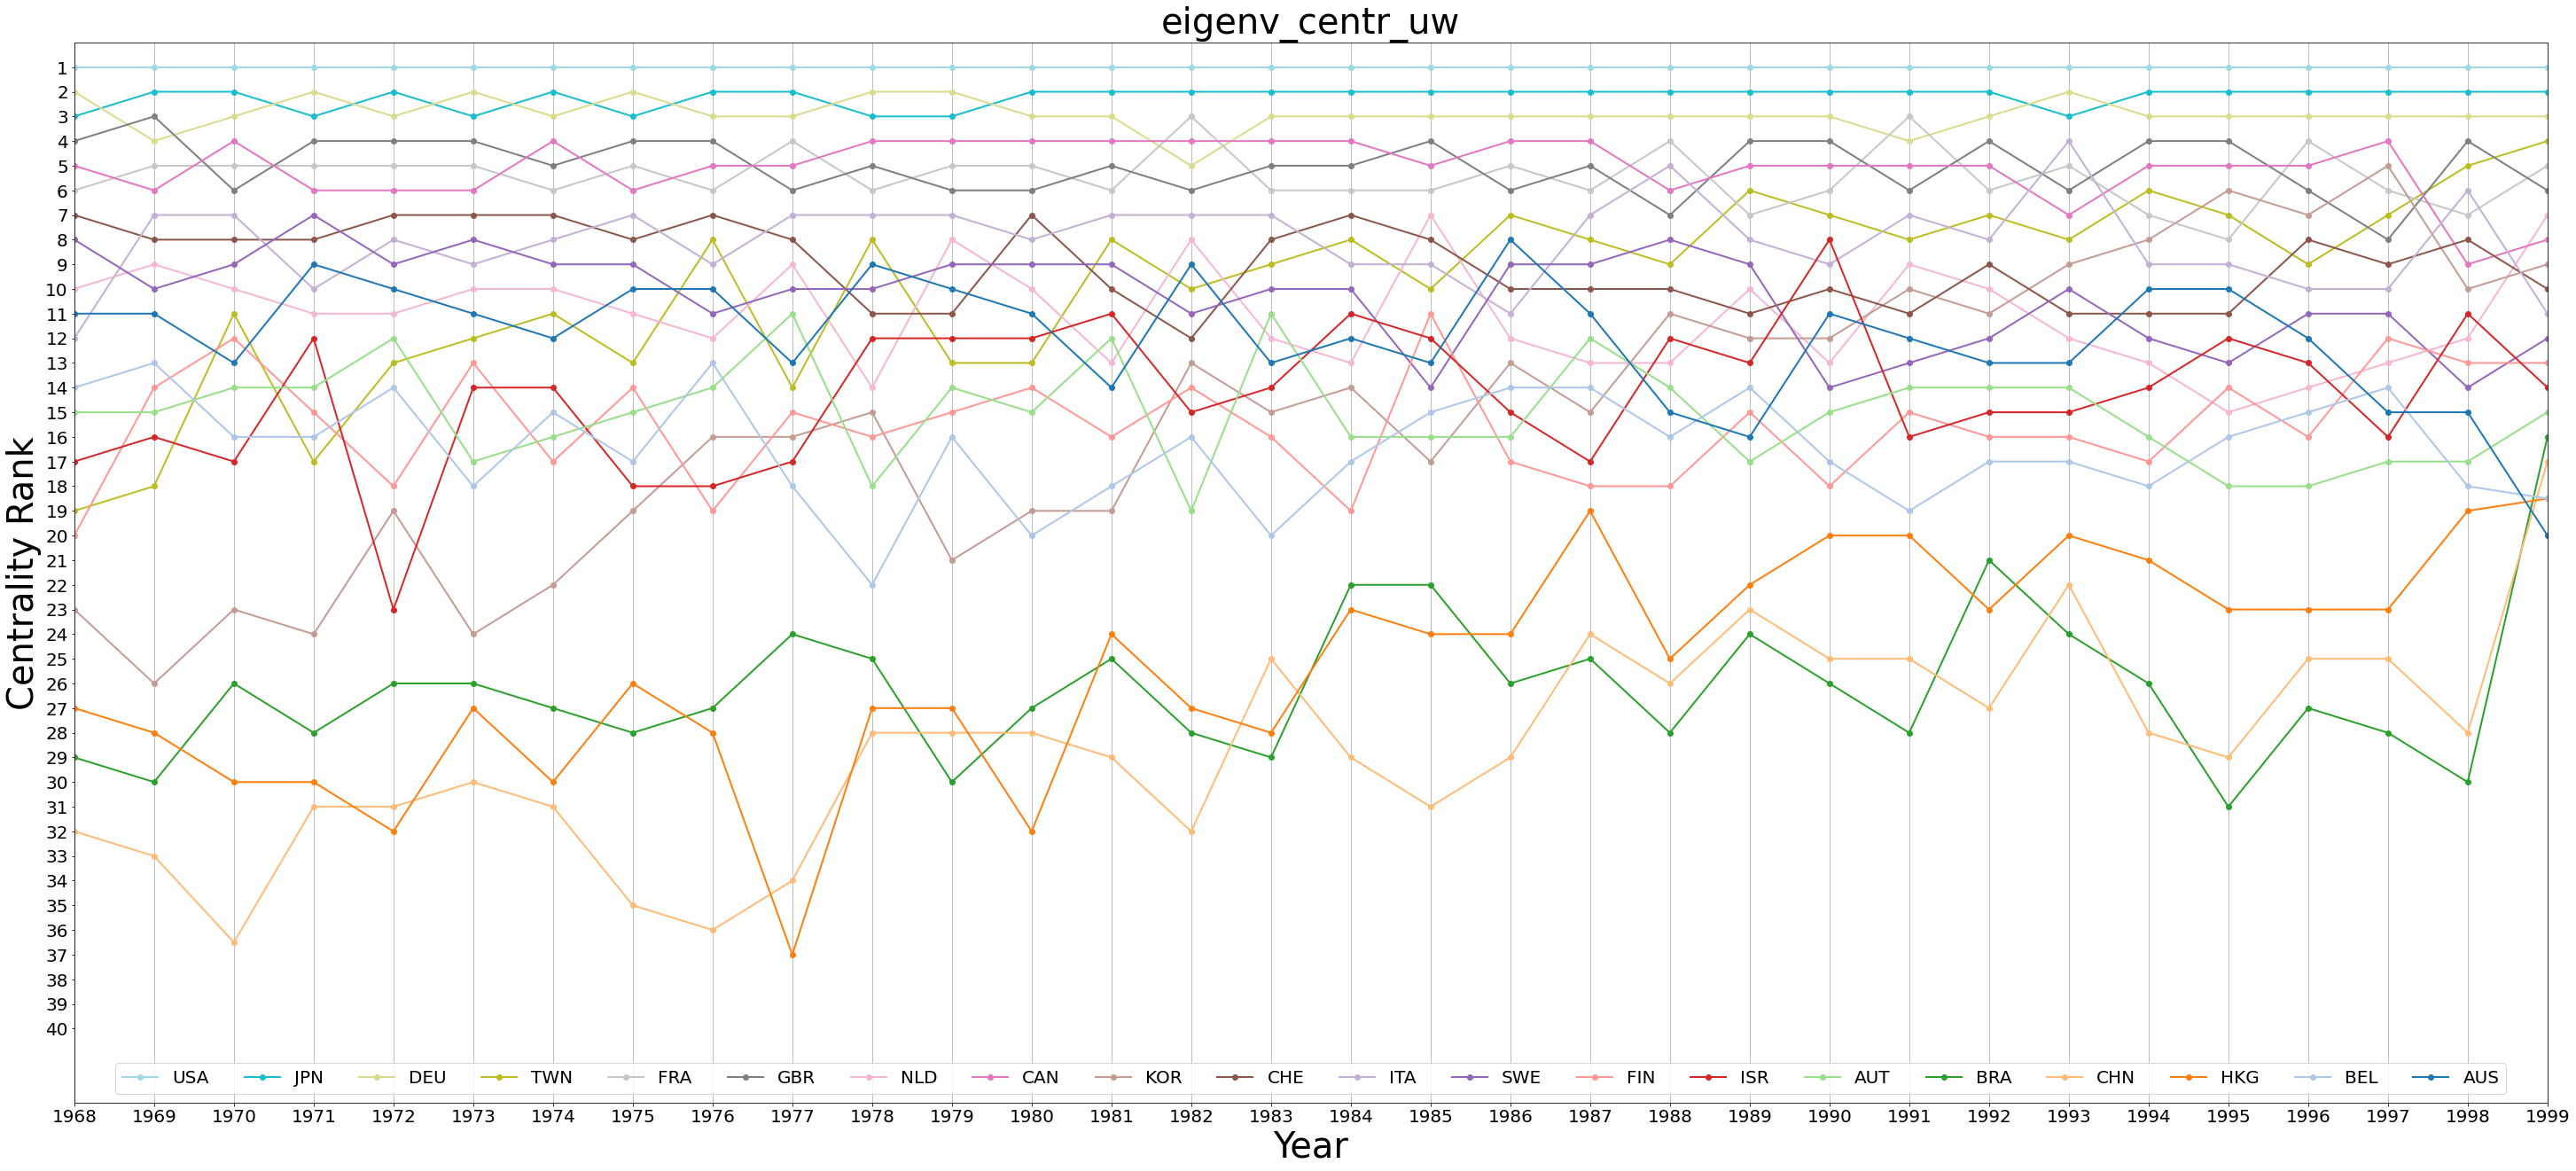

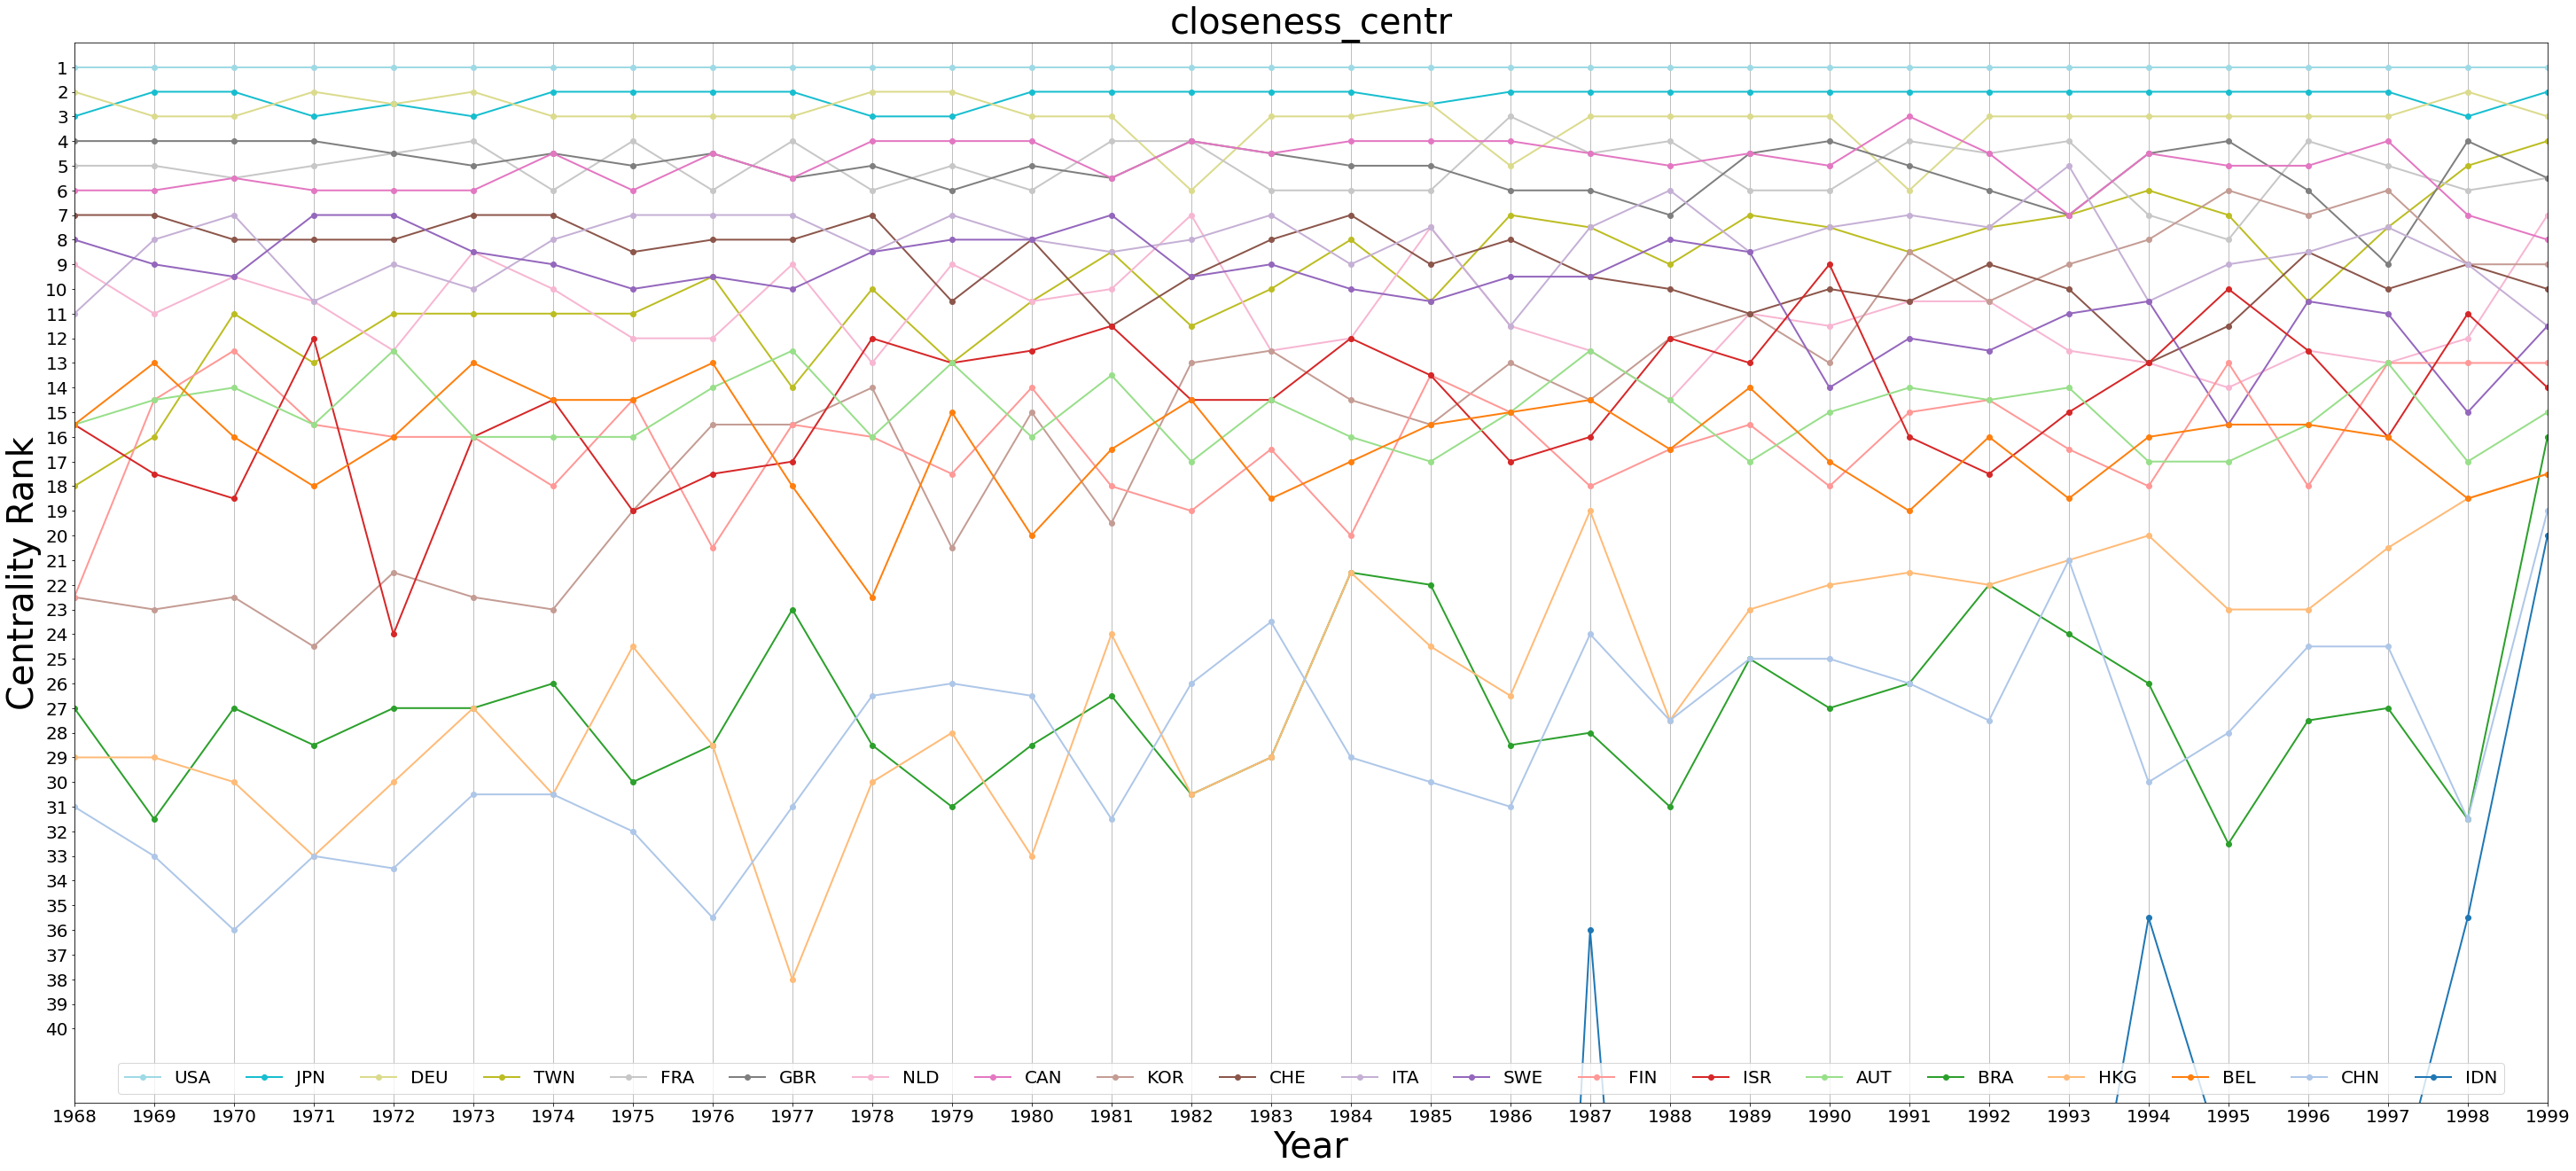

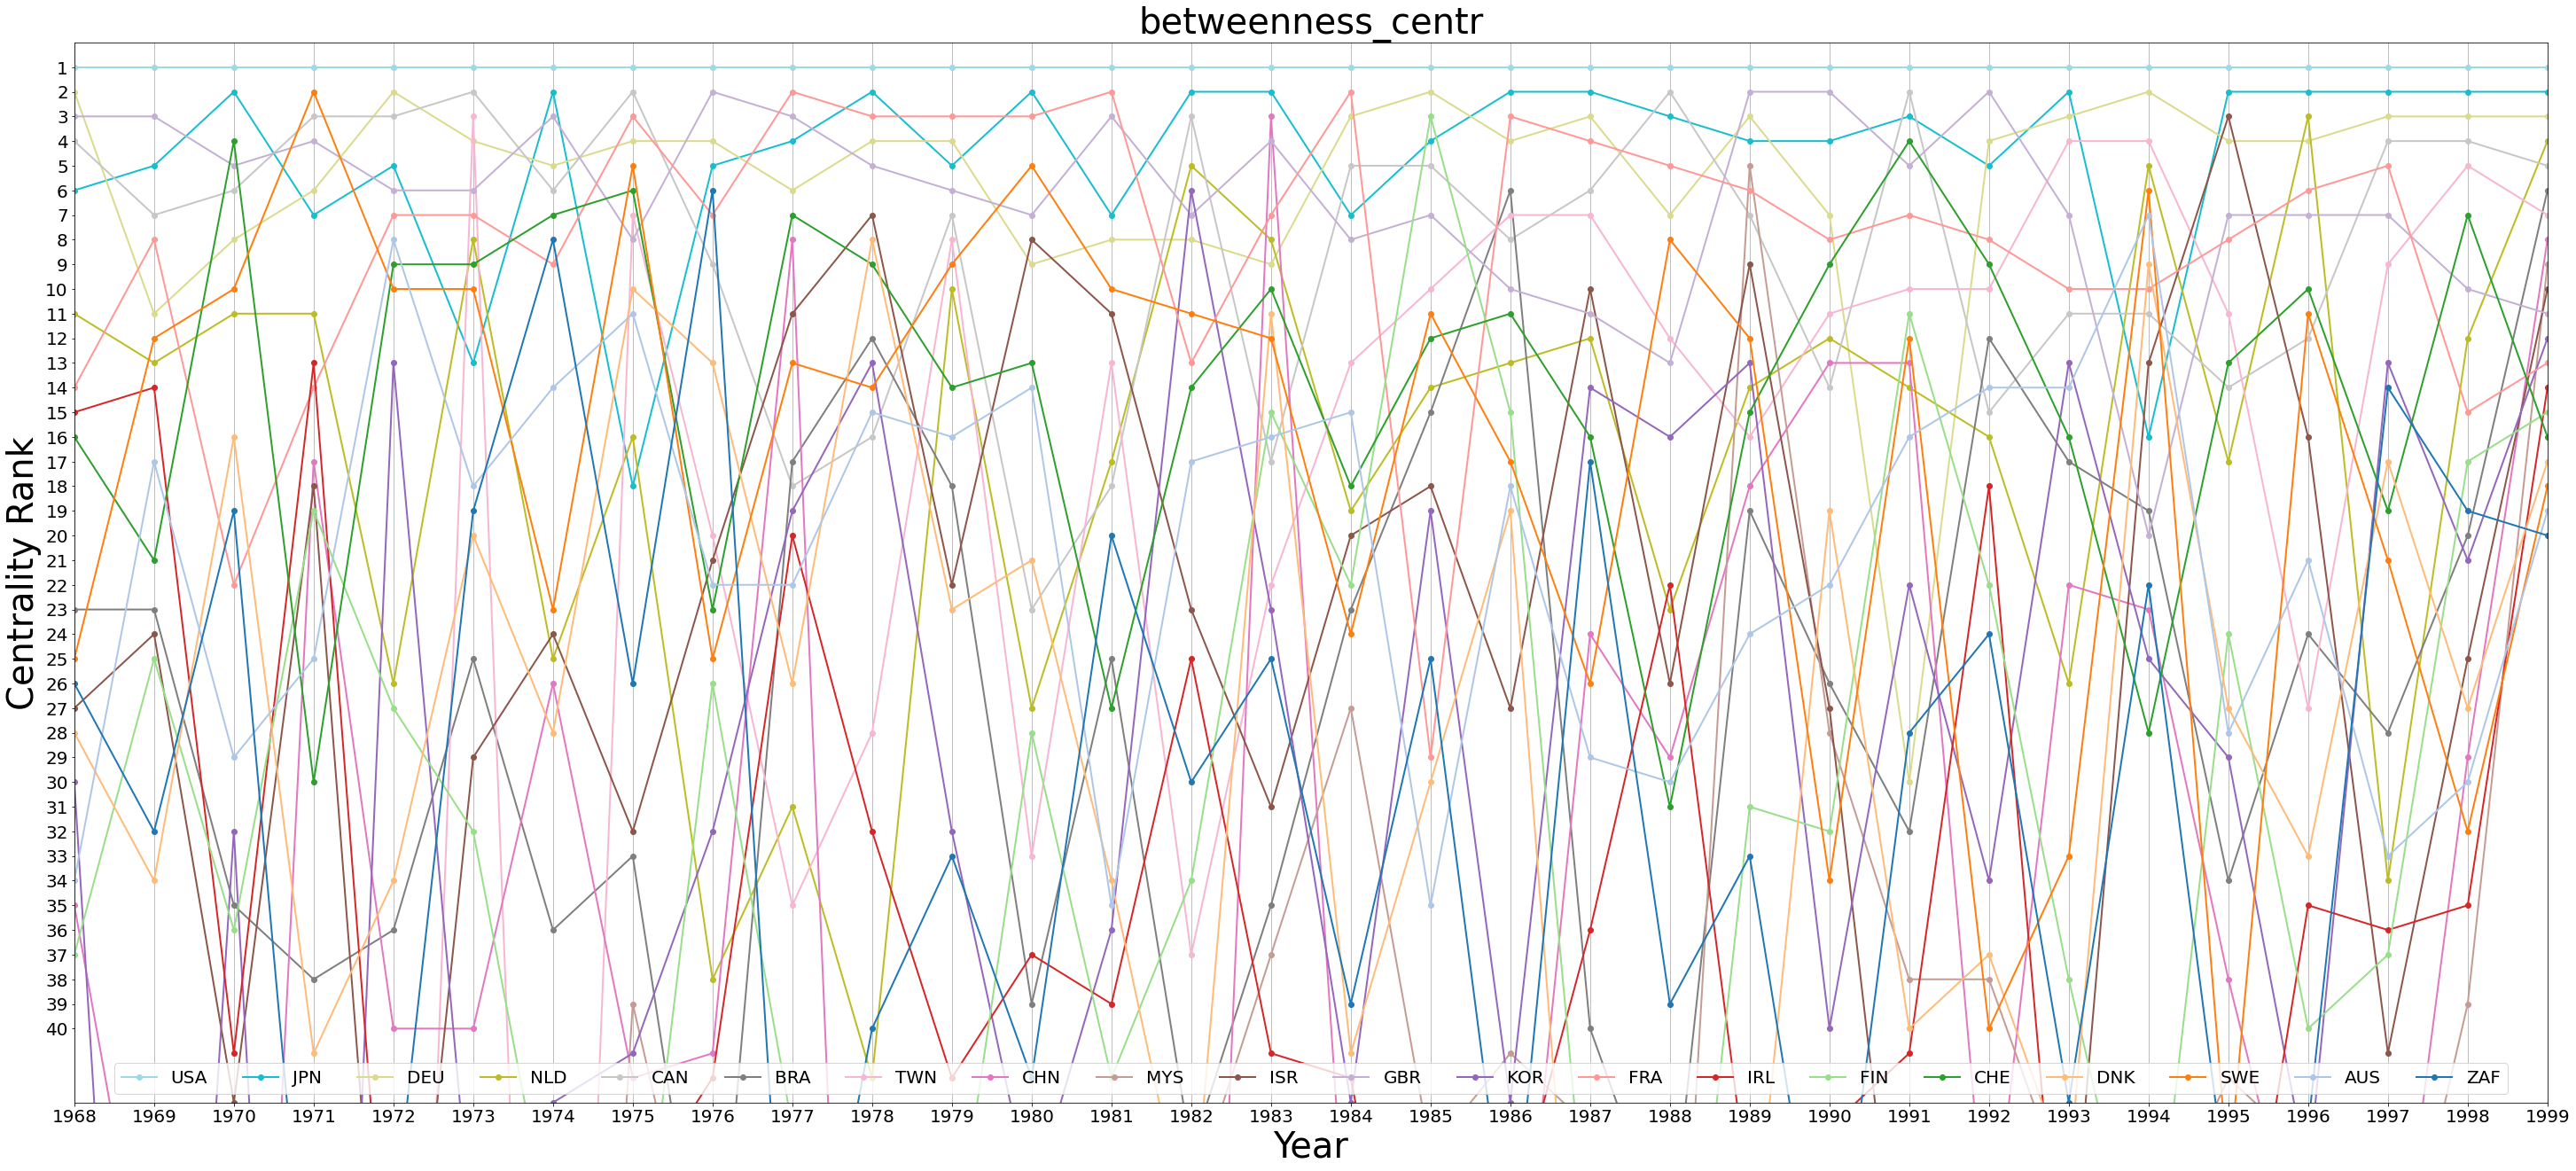

In [12]:
for i in range(len(centr_rank_dfs)):
    plot_bumpchart(df=centr_rank_dfs[i], title=centr_types[i], topN=20)